In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from collections import Counter
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
import string



'Link: http://varianceexplained.org/r/trump-tweets/'

'Link: http://varianceexplained.org/r/trump-tweets/'

In [3]:
tweets = pd.read_csv('trump_tweets_df.csv',encoding='latin1')
tweets.shape

(1512, 17)

In [4]:
tweets_android = tweets[tweets.statusSource.str.contains('android')]
tweets_iphone = tweets[tweets.statusSource.str.contains('iphone')]
tweets_android['created'] = pd.to_datetime(tweets_android['created'])
tweets_iphone['created'] = pd.to_datetime(tweets_iphone['created'])

/Users/macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/macbook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
tweets_android.retweetCount.mean(),tweets_iphone.retweetCount.mean()

(6262.1010498687665, 6648.1305732484079)

In [7]:
tweets_android.favoriteCount.mean(),tweets_iphone.favoriteCount.mean()

(19279.078740157482, 18285.004777070062)

In [8]:
tweets['created'] = pd.to_datetime(tweets['created'])

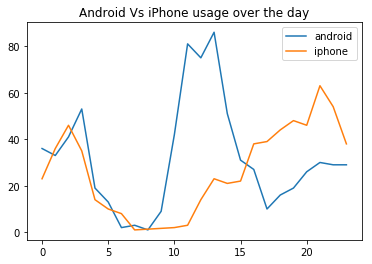

In [9]:
#Tweeter usage over the day between iphone and android

android = dict(Counter(np.array(tweets_android.created.dt.hour)))
iphone = dict(Counter(np.array(tweets_iphone.created.dt.hour)))

#sns.distplot(android,color='red',bins=24)
#sns.distplot(iphone,color='blue',bins=24)
#plt.hist(i,color='blue')

androidLists = sorted(android.items()) # sorted by key, return a list of tuples
iphoneLists = sorted(iphone.items())

androidX, androidY = zip(*androidLists) # unpack a list of pairs into two tuples
iphoneX, iphoneY = zip(*iphoneLists)

plt.plot(androidX, androidY)
plt.plot(iphoneX,iphoneY)
plt.title('Android Vs iPhone usage over the day')
plt.legend(['android','iphone'])
plt.show()

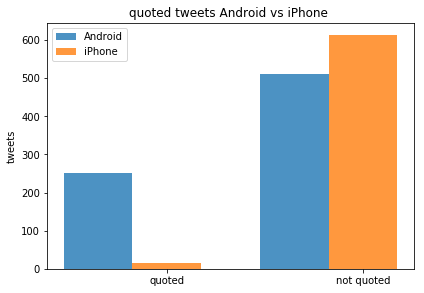

In [10]:
#android tweets
qat = tweets_android[tweets_android.text.str.contains('"')]
nqat = tweets_android[~tweets_android.text.str.contains('"')]
at = (len(qat),len(nqat))

#iphone tweets
qit = tweets_iphone[tweets_iphone.text.str.contains('"')]
nqit = tweets_iphone[~tweets_iphone.text.str.contains('"')]
it = (len(qit),len(nqit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('quoted', 'not quoted'))
plt.legend()
plt.tight_layout()
plt.title('quoted tweets Android vs iPhone ')
plt.show()


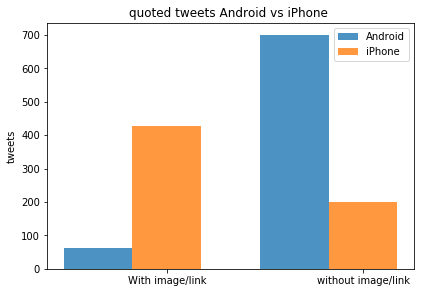

In [11]:
#android tweets
lat = tweets_android[tweets_android.text.str.contains('t.co')]
nlat = tweets_android[~tweets_android.text.str.contains('t.co')]
at = (len(lat),len(nlat))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains('t.co')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains('t.co')]
it = (len(lit),len(nlit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets'),
plt.xticks(index + bar_width, ('With image/link', 'without image/link'))
plt.legend()
plt.tight_layout()
plt.title('quoted tweets Android vs iPhone ')
plt.show()

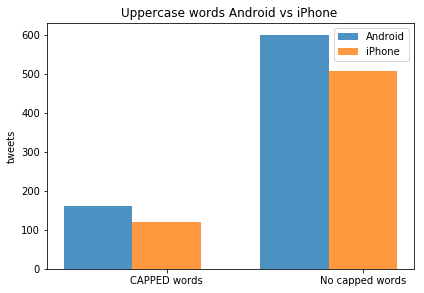

In [36]:

#android tweets
lat = tweets_android[tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
nlat = tweets_android[~tweets_android.text.str.contains(r'\b[A-Z]{4,}\b')]
at = (len(lat),len(nlat))

#iphone tweets
lit = tweets_iphone[tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
nlit = tweets_iphone[~tweets_iphone.text.str.contains(r'\b[A-Z]{4,}\b')]
it = (len(lit),len(nlit))

fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.35
rectsA = plt.bar(index,at,bar_width,alpha=0.8, label="Android")
rectsB = plt.bar(index+bar_width,it,bar_width,alpha=0.8, label="iPhone")
plt.ylabel('tweets')
plt.xticks(index + bar_width, ('CAPPED words', 'No capped words'))
plt.legend()
plt.tight_layout()
plt.title('Uppercase words Android vs iPhone ')
plt.show()

/home/nick/.local/lib/python3.5/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/home/nick/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


<function matplotlib.pyplot.show>

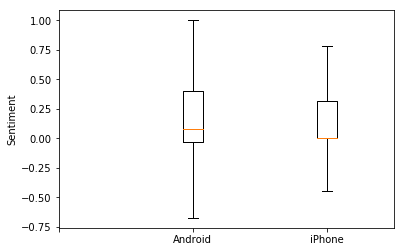

In [34]:
#sentiment analysis based on textblob sentiment
from textblob import TextBlob

tweets_android[['polarity', 'subjectivity']] = tweets_android.text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
tweets_iphone[['polarity', 'subjectivity']] = tweets_iphone.text.apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

fig, ax = plt.subplots()
ax.boxplot([tweets_android.polarity,tweets_iphone.polarity], showfliers=False)
plt.ylabel('Sentiment')
plt.xticks(np.arange(3),('','Android','iPhone'))
plt.show

In [34]:
#wordcount


words_android = str(tweets_android.text.values)
words_android = " ".join(re.findall("[a-zA-Z]+", words_android))

words_iphone = str(tweets_iphone.text.values)
words_iphone = " ".join(re.findall("[a-zA-Z]+", words_iphone))


stop = set(stopwords.words('english'))



android = Counter([i for i in word_tokenize(words_android.lower()) if i not in stop]).most_common(10)
iphone = Counter([i for i in word_tokenize(words_iphone.lower()) if i not in stop]).most_common(10)
